In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df=pd.read_csv("Customer_churn.csv")

In [17]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [18]:
#dropping the customerID column as it will not help us for prediction
df.drop(['customerID'],axis=1,inplace=True)

In [19]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [21]:

df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [23]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [24]:
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [25]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [26]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [27]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [28]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [30]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [31]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [32]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [33]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [34]:
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [35]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [36]:
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [37]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [38]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [39]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [40]:
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [41]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [42]:
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [43]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [44]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [45]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [46]:
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [47]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [48]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [49]:
df['TotalCharges'].nunique()

6531

In [50]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [51]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

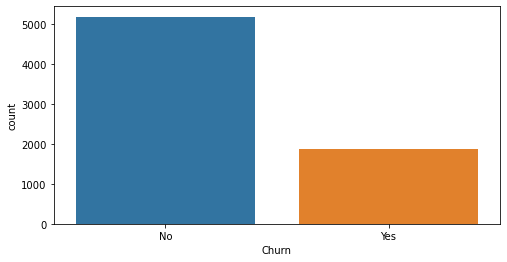

In [52]:
plt.figure(figsize=(8,4))
sns.countplot(x='Churn',data=df)

Data imbalance is present in the churn column.

In [53]:

#changing datatype of totalcharges to float
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

<AxesSubplot:>

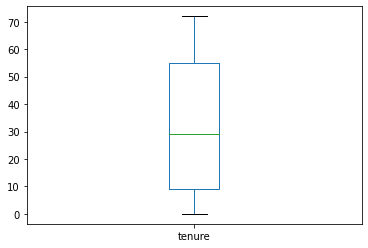

In [54]:
# checking outliers in numerical columns-tenure,MonthlyCharges,Totalcharges
df['tenure'].plot(kind='box')

<AxesSubplot:>

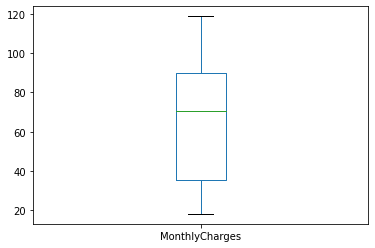

In [55]:
df['MonthlyCharges'].plot(kind='box')

<AxesSubplot:>

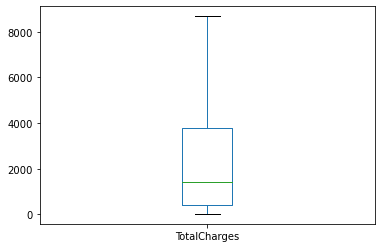

In [56]:
df['TotalCharges'].plot(kind='box')

Clearly,no outliers are present in these columns.

In [57]:
#converting churn into numerical.
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Churn'] = LE.fit_transform(df['Churn'])

In [58]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [59]:
#converting gender,Partner,Dependents,PhoneService,PaperlessBilling column into numerical values.
df['gender'] = LE.fit_transform(df['gender'])
df['Partner'] = LE.fit_transform(df['Partner'])
df['Dependents'] = LE.fit_transform(df['Dependents'])
df['PhoneService'] = LE.fit_transform(df['PhoneService'])
df['PaperlessBilling'] = LE.fit_transform(df['PaperlessBilling'])

In [60]:
#one hot encoding features conversion
feat_ohe=['MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
          'StreamingTV','StreamingMovies','Contract','PaymentMethod']
df=pd.get_dummies(df,columns=feat_ohe)

<AxesSubplot:xlabel='Contract_Month-to-month', ylabel='Churn'>

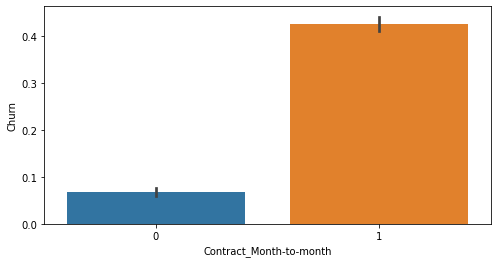

In [61]:
plt.figure(figsize=(8,4))
sns.barplot(x='Contract_Month-to-month',y='Churn',data=df)

Customers with contract month to month have more chances of churn than customers with contract of 1 year and 2 year

<AxesSubplot:xlabel='PaymentMethod_Bank transfer (automatic)', ylabel='Churn'>

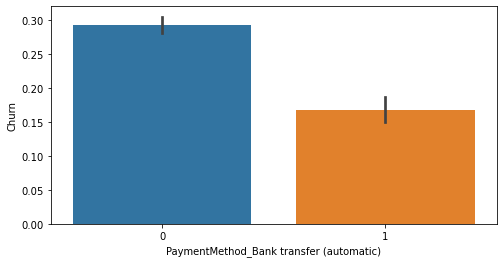

In [62]:
plt.figure(figsize=(8,4))
sns.barplot(x='PaymentMethod_Bank transfer (automatic)',y='Churn',data=df)

<AxesSubplot:xlabel='PaymentMethod_Mailed check', ylabel='Churn'>

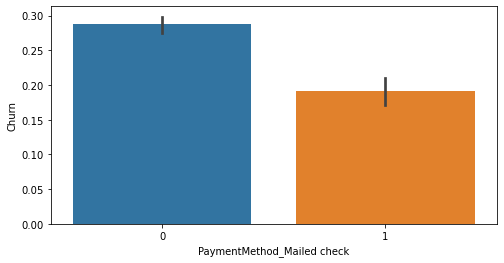

In [63]:
plt.figure(figsize=(8,4))
sns.barplot(x='PaymentMethod_Mailed check',y='Churn',data=df)

<AxesSubplot:xlabel='PaymentMethod_Electronic check', ylabel='Churn'>

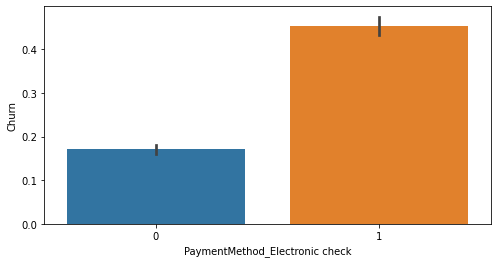

In [64]:
plt.figure(figsize=(8,4))
sns.barplot(x='PaymentMethod_Electronic check',y='Churn',data=df)

Customers who have automatic payment method and mailed check have less chances of churning whereas customers having Electronic check as payment have more chances of churning

<AxesSubplot:>

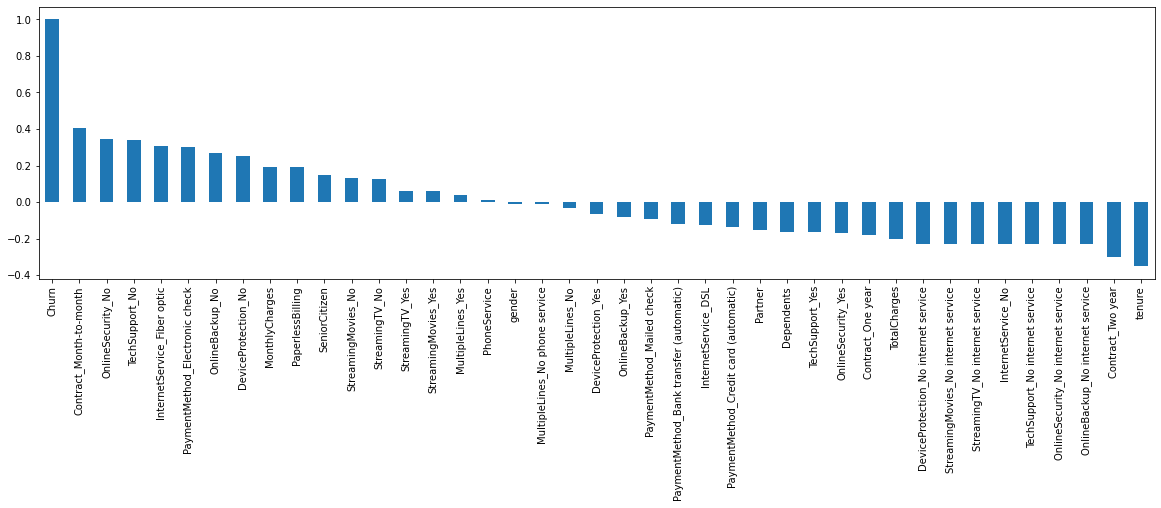

In [65]:
df.corr()['Churn'].sort_values(ascending=False).plot(kind='bar',figsize=(20,5))

Customers with contract month to month,No online security,No TechSupport,No online Backup,No Device Protection and payment method of electronic check have more chances of churn.
Customers with more tenure or contract year of 2 years have least chances of a churn.

<AxesSubplot:xlabel='Partner', ylabel='Churn'>

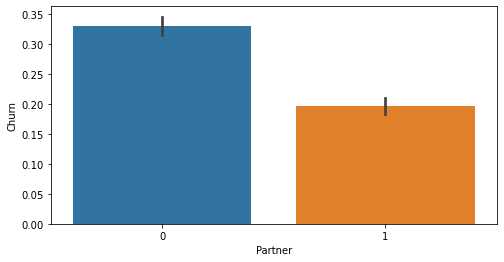

In [68]:
plt.figure(figsize=(8,4))
sns.barplot(x='Partner',y='Churn',data=df)

Customer with partner has less chances of churn.

<AxesSubplot:xlabel='Partner', ylabel='Churn'>

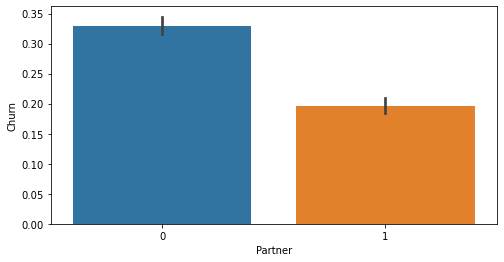

In [69]:
plt.figure(figsize=(8,4))
sns.barplot(x='Partner',y='Churn',data=df)

Customer with partner has less chances of churn

<AxesSubplot:xlabel='Dependents', ylabel='Churn'>

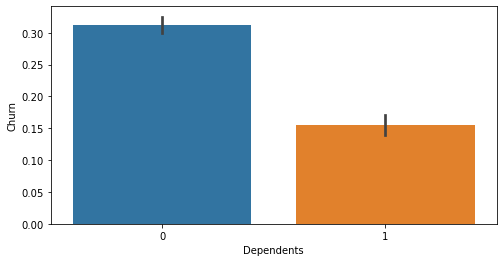

In [71]:
plt.figure(figsize=(8,4))
sns.barplot(x='Dependents',y='Churn',data=df)

Customers with no dependents have more chance of churn.

In [72]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [73]:
#Scaling the identified columns in dataset
sc_col=['tenure','MonthlyCharges','TotalCharges']
df_col=pd.DataFrame(df,columns=sc_col)
df_rest=df.drop(columns=sc_col)

sc_feat=mms.fit_transform(df_col)
df_sc_ft=pd.DataFrame(sc_feat,columns=sc_col,index=df_rest.index)

df=pd.concat([df_rest,df_sc_ft],axis=1)

In [74]:
df.isnull().sum()

gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
PhoneService                                0
PaperlessBilling                            0
Churn                                       0
MultipleLines_No                            0
MultipleLines_No phone service              0
MultipleLines_Yes                           0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
OnlineSecurity_No                           0
OnlineSecurity_No internet service          0
OnlineSecurity_Yes                          0
OnlineBackup_No                             0
OnlineBackup_No internet service            0
OnlineBackup_Yes                            0
DeviceProtection_No                         0
DeviceProtection_No internet service        0
DeviceProtection_Yes              

In [75]:
#dropping the rows with null values as our dataset is large
df=df.dropna()

In [76]:
x1=df.drop('Churn',axis=1)
x=x1.values
y=df['Churn'].values

In [77]:

from imblearn.over_sampling import SMOTE
smt= SMOTE()
xtrain,ytrain=smt.fit_resample(x,y)

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [79]:
model=[LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
max_acc_score=0
for r_state in range(40,90):
    x1_train,x1_test,y1_train,y1_test=train_test_split(xtrain,ytrain,random_state=r_state,test_size=0.2)
    for i in model:
        i.fit(x1_train,y1_train)
        predx=i.predict(x1_test)
        acc_sc=accuracy_score(y1_test,predx)
        if acc_sc>max_acc_score:
            max_acc_score=acc_sc
            final_state=r_state
            final_model=i

print("max accuracy score correspond to random state",final_state,"is",max_acc_score,"and model is",final_model)

max accuracy score correspond to random state 43 is 0.8697967086156825 and model is RandomForestClassifier()


In [80]:
train_x,test_x,train_y,test_y=train_test_split(xtrain,ytrain,test_size=.2,random_state=83)

In [81]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,xtrain,ytrain,cv=10,scoring='accuracy')
print("cross validation score for Random Forest Classifier:",np.mean(rfc_score))

cross validation score for Random Forest Classifier: 0.8596927365916989


In [82]:

parameter={'n_estimators':[100,200,350],'max_depth':range(2,10),
          'criterion':['gini','entropy'],
          'max_features':['auto','sqrt','log2']}
GCV=GridSearchCV(rfc,parameter,cv=10,scoring='accuracy',n_jobs=-1)
GCV.fit(train_x,train_y)
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 350}

In [83]:

final_mod=RandomForestClassifier(criterion='gini',max_depth= 9,max_features='auto', n_estimators=350)
final_mod.fit(train_x,train_y)
pred=final_mod.predict(test_x)
acc1=accuracy_score(test_y,pred)
f1_sc=f1_score(test_y,pred)
print(acc1)
print(f1_sc)

0.8426911907066795
0.8470588235294118


In [84]:
print("CLASSIFICATION REPORT::\n",classification_report(test_y,pred))

CLASSIFICATION REPORT::
               precision    recall  f1-score   support

           0       0.89      0.79      0.84      1060
           1       0.80      0.89      0.85      1006

    accuracy                           0.84      2066
   macro avg       0.85      0.84      0.84      2066
weighted avg       0.85      0.84      0.84      2066



In [85]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

0.8440142165872688


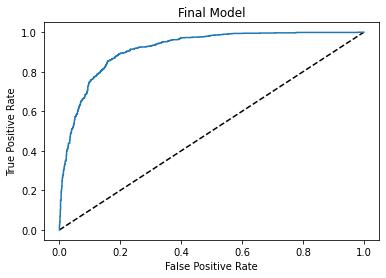

In [86]:

y_pred_prob=final_mod.predict_proba(test_x)[:,1]
fpr,tpr,threshold=roc_curve(test_y,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Final Model')
auc_score=roc_auc_score(test_y,final_mod.predict(test_x))
print(auc_score)

### Saving the Model

In [88]:
import joblib
joblib.dump(final_mod,'customer-churn.obj')

['customer-churn.obj']

In [89]:
a=np.array(test_y)
predicted=np.array(final_mod.predict(test_x))
df_com=pd.DataFrame({"original":a,"predicted":predicted},index=range(len(a)))
df_com

,original,predicted
0,1,1
1,1,1
2,1,1
3,1,0
4,1,1
...,...,...
2061,0,0
2062,0,0
2063,0,0
2064,0,0
